In [ ]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton, bisect
from scipy.interpolate import lagrange, CubicHermiteSpline
from scipy.integrate import quad, romberg
from scipy.misc import derivative
import sympy as sp
import pandas as pd

# Parcial/Taller Métodos Computacionales
**2024-2**

---

*Nombre:*

*Identificación:*

---
* Sea honest@
* $\color{red}{\text{La parte escrita del parcial/taller NO tendrá validez si no es sustentado
}}$
* Sea ordendado dando la solución a cada punto.
* *Asegurese que el notebook corra completamente*
* Todo lo que presente aquí será sujeto a evaluación.
* **Debe subirlo a carpeta de GitHub del curso antes del lunes 16 de diciembre a las 11:59 p.m.**

#1
Una carga total $Q$ se distribuye uniformemente alrededor de un conductor en forma de anillo de radio $a$. Una carga $q$ se encuentra a una distancia $x$ horizontalmente a través del centro del anillo. La fuerza ejercida sobre la carga por el anillo está dada por:

$$F = \frac{1}{4\piϵ_0}\frac{qQx}{(x^2+a^2)^{3/2}}$$

con $q$ y $Q$ de $2\times 10^{-5}$C.

  * Escriba una función donde ingresen los valores de $a$ y $x$ para hallar la fuerza.
  * Haga un gráfico de $F(x)$ para un anillo de radio $a= 0.85$m para $0.1\leq x\leq 2.0$m
  * Usando el método de Newton-Raphson y otro diferente, para encontrar el valor de $x$ en el cual la fuerza será equivalente a 1.25 N.
  * Encuentre qué sucede si disminuimos el radio con respecto a la fuerza que experimentará la carga $q$.

Text(0.5, 1.0, 'Gráfico de la Fórmula')

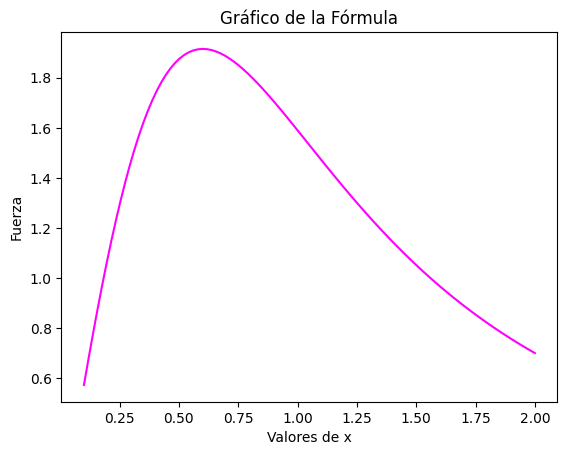

In [ ]:
#a)
def funcion(a,x):
  e0 = 8.854187817e-12
  q = 2e-5
  Q = 2e-5
  return 1/(4*np.pi*e0) * q*Q*x/(x**2+a**2)**(3/2)

#b)
x_vals = np.linspace(0.1, 2, 100)
F = funcion(0.85, x_vals)

plt.plot(x_vals, F, color = "magenta")
plt.xlabel("Valores de x")
plt.ylabel("Fuerza")
plt.title("Gráfico de la Fórmula")

In [ ]:
#c)
#Valores de las variables
e0 = 8.854187817e-12
q = 2e-5
Q = 2e-5

x = sp.symbols('x')
f_ = 1/(4*sp.pi*e0) * q*Q*x/(x**2+0.85**2)**(3/2) - 1.25
df_ = sp.diff(f_, x)

f = sp.lambdify(x, f_)
df = sp.lambdify(x, df_)

#Método de Newton
raiz11 = newton(f, 1, df)

#Método bisección
raiz12 = bisect(f, 1, 2)

print(f"Valor de x con el método de Newton x = {raiz11}m")
print(f"Valor de x con el método de Bisección x = {raiz12}m")

Valor de x con el método de Newton x = 1.2973739419288763m
Valor de x con el método de Bisección x = 1.2973739419303456m


Text(0.5, 1.0, 'Cambio de la fuerza F al disminuir el radio a')

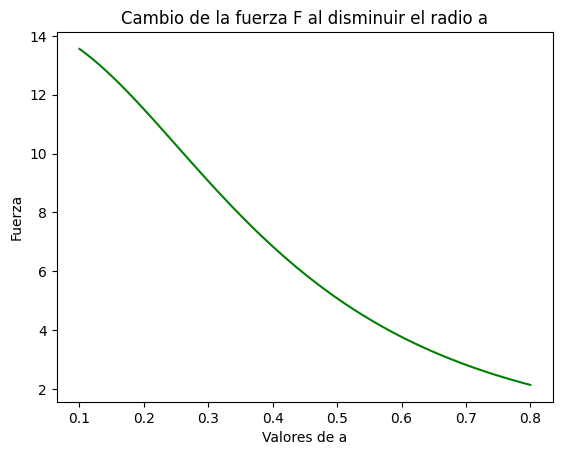

In [ ]:
#d)
a = np.linspace(0.1, 0.8, 100)
F2 = funcion(a, 0.5)  #Tomamos un valor fijo para x

plt.plot(a, F2, color = "green")
plt.xlabel("Valores de a")
plt.ylabel("Fuerza")
plt.title("Cambio de la fuerza F al disminuir el radio a")

#Si se reduce el radio aumenta la fuerza

# 2

La ley de Planck expresa la densidad espectral de energía de la radiación electromagnética emitida por un cuerpo negro en equilibrio térmico:

$$
u(\lambda, T) = \frac{8 \pi h c}{\lambda^5} \frac{1}{\exp\left(\frac{h c}{\lambda k_B T}\right) - 1},
$$

donde $T$ es la temperatura de equilibrio, $\lambda$ es la longitud de onda, $h = 6.62606957 \times 10^{-34} \ \text{J·s}$ es la constante de Planck, $k_B = 1.3806488 \times 10^{-23} \ \text{J·K}^{-1}$ es la constante de Boltzmann, y $c = 2.99792458 \times 10^8 \ \text{m·s}^{-1}$ es la velocidad de la luz en el vacío. La función $u(\lambda, T)d\lambda$ representa la energía radiada en el intervalo espectral $(\lambda, \lambda + d\lambda)$.

Introduciendo la variable adimensional

$$
x = \frac{\lambda}{\lambda_0},
$$

y los parámetros dependientes de la temperatura:

$$
\lambda_0 = \frac{h c}{k_B T}, \quad K = \frac{8 \pi k_B T}{\lambda_0^4},
$$

la ley de Planck se convierte en:

$$
u(\lambda, T) = K \frac{1}{x^5 \left(e^{1/x} - 1\right)}.
$$

La ley de desplazamiento de Wien establece que, para un cuerpo negro, la longitud de onda $\lambda_{\text{max}}$ correspondiente al máximo de $u(\lambda, T)$ es inversamente proporcional a la temperatura $T$ o, equivalentemente:

$$
\lambda_{\text{max}} T = 2.897768 \times 10^{-3} \ \text{m·K}.
$$

* Escriba una función para la densidad espectral como función de $\lambda$ y $T$

* Graficar la densidad espectral de energía $u(\lambda, T)$ para temperaturas de equilibrio $T = 2000, 4000, 6000$ y $8000 \ \text{K}$.

* Encuentre de manera simbólica $\frac{\partial u(\lambda, T)}{\partial \lambda} $ y realice un gráfico para las temperaturas y longitudes de onda usadas en el numeral anterior.

* Hallar el máximo de $u(\lambda, T)$ para la radiación electromagnética del Sol, considerando la temperatura efectiva de la fotosfera $T = 5778 \ \text{K}$. Usar el método numérico de Newton para la derivada y comprobar la validez de la ley de Wien.


In [ ]:
#a)
def funcion2(T, L):
  '''
  T: temperatura
  L: longitud de onda
  '''
  h = 6.62606957e-34
  kb = 1.3806488e-23
  c = 2.99792458e8

  L0 = h*c/(kb*T)
  k = 8*np.pi*kb*T/L0**4
  x = L/L0

  return k*1/(x**5*(np.exp(1/x)-1))


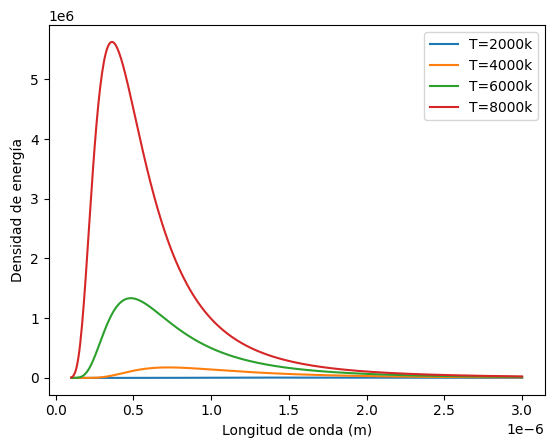

In [ ]:
#b)
L_ = np.linspace(1e-7, 3e-6, 500)

plt.plot(L_, funcion2(2000, L_), label="T=2000k")
plt.plot(L_, funcion2(4000, L_), label="T=4000k")
plt.plot(L_, funcion2(6000, L_), label="T=6000k")
plt.plot(L_, funcion2(8000, L_), label="T=8000k")
plt.xlabel("Longitud de onda (m)")
plt.ylabel("Densidad de energía")
plt.legend()

In [ ]:
#c)
L, T = sp.symbols('L T')

#Valores de las variables
h = 6.62606957e-34
kb = 1.3806488e-23
c = 2.99792458e8
L0 = h*c/(kb*T)
k = 8*np.pi*kb*T/L0**4
xi = L/L0

#Funcion
u = k * 1/(xi**5 * ((sp.exp(1 / xi) - 1)))

#Derivadas
df1_u_ = sp.diff(u, L)
df2_u_ = sp.diff(df1_u_, T)

print("Derivada simbólica")
df2_u_  #Derivada simbólica

Derivada simbólica


-4.30984130431481e-25*exp(0.0143877695998382/(L*T))/(L**7*T**2*(exp(0.0143877695998382/(L*T)) - 1)**2) - 1.03348339497246e-27*exp(0.0143877695998382/(L*T))/(L**8*T**3*(exp(0.0143877695998382/(L*T)) - 1)**2) + 2.06696678994491e-27*exp(0.0287755391996763/(L*T))/(L**8*T**3*(exp(0.0143877695998382/(L*T)) - 1)**3)

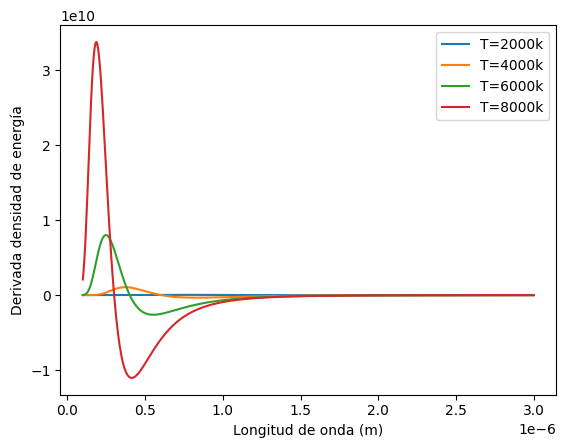

In [ ]:
#Gráfico
df2_u = sp.lambdify((T, L), df2_u_, "numpy")

plt.plot(L_, df2_u(2000, L_), label="T=2000k")
plt.plot(L_, df2_u(4000, L_), label="T=4000k")
plt.plot(L_, df2_u(6000, L_), label="T=6000k")
plt.plot(L_, df2_u(8000, L_), label="T=8000k")
plt.xlabel("Longitud de onda (m)")
plt.ylabel("Derivada densidad de energía")
plt.legend()

In [ ]:
#d)
func_ = u.subs(T, 5778)   #Cambiamos T por el valor de 5778
func = sp.lambdify(L, func_, "numpy")  #Funcion

df_func_ = sp.diff(func_, L)   #Primera derivada
df_func = sp.lambdify(L, df_func_, "numpy")

df_func2_ = sp.diff(df_func_, L)
df_func2 = sp.lambdify(L, df_func2_, "numpy")

w0 = newton(df_func, 5e-7, df_func2)

#Ley de Wien
w = 2.897768e-3 / 5778

print("Valor máximo de u(λ,T):")
print(f"-Método de Newton λ={w0}")
print(f"-Ley de Wien λ={w}")

Valor máximo de u(λ,T):
-Método de Newton λ=5.0150884738182e-07
-Ley de Wien λ=5.015174800969193e-07


#3

La siguiente función describe la distribución de temperatura de una placa rectangular para $-2.0\leq x \leq 0$ y $0\leq y\leq 3$

$$T(x,y) = 2 + x - y + 2x^2 + 2xy + y^2$$


* Desarrolle una función para la $T(x,y)$.
* Haga un dataframe con los valores de $x$, $y$ y $T$ tomando 50 datos en total y realice un gráfico de calor para la placa metálica. *Ayuda: emplee `np.meshgrid` y `plt.pcolormesh`*.
* Ahora, utilizando unicamente 9 puntos $(x,y)$ de $T$, use la interpolación de Lagrange para encontrar el valor de $T(-1.63, 1.627)$, y determine el error absoluto y relativo.
* Realice el mismo procedimiento anterior para Splines Cúbicas.


In [ ]:
#a)
f3 = lambda x,y: 2 + x - y + 2*x**2 + 2*x*y + y**2

#b)
x_vals3 = np.linspace(-2.0, 0.0, 10)  # 10 puntos para x
y_vals3 = np.linspace(0.0, 3.0, 5)    # 5 puntos para y

X, Y = np.meshgrid(x_vals3, y_vals3)
Z = f3(X, Y)

data3 = pd.DataFrame({
    'x': X.ravel(),
    'y': Y.ravel(),
    'T': Z.ravel()
})

#Tabla de datos
data3

,x,y,T
0,-2.000000,0.00,8.000000
1,-1.777778,0.00,6.543210
2,-1.555556,0.00,5.283951
3,-1.333333,0.00,4.222222
4,-1.111111,0.00,3.358025
5,-0.888889,0.00,2.691358
6,-0.666667,0.00,2.222222
7,-0.444444,0.00,1.950617
8,-0.222222,0.00,1.876543
9,0.000000,0.00,2.000000


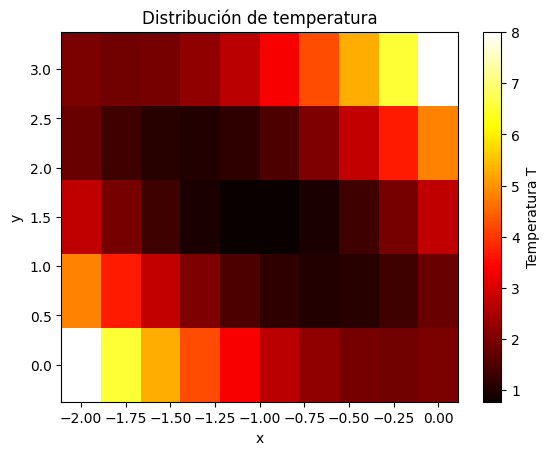

In [ ]:
#Gráfico
plt.pcolormesh(X, Y, Z, cmap='hot')
plt.colorbar(label='Temperatura T')
plt.title('Distribución de temperatura')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#4
Usando los siguiente datos realice lo siguiente:



```python
x = [-5.      -3.33333 -1.66667  0.       1.66667  3.33333  5.     ]

y = [1.48672e-06 1.54228e-03 9.94771e-02 3.98942e-01 9.94771e-02 1.54228e-03
 1.48672e-06]
```



* Lealos y grafiquelos en un dataframe.
* Usando interpolación de Lagrange, encuentre el polinomio asociado y grafiquelo.
* Ahora, use la interpolación de Hermite para obtener el polinomio.
* Sabemos que los puntos parten de la distribución normal que se define como:
$$f(x) = \frac{1}{\sqrt{2\pi}}\exp^{-x^2/2}$$

* Haga una gráfica de $f(x)$ y comparela con los polinomios anteriores en función del error, encuentre el valor teórico.
* Encuentre los puntos de inflexión para $f(x)$ númericamente, y compare con el valor exacto. Halle el error absoluto.
* Integre la función entre $-1\leq x\leq 1$ y para $-3\leq x\leq x$. Si el área total de $-\infty \leq x\leq \infty $ deber ser igual a 1, a que proporción de la curva hacen parte los intervalos del punto anterior.

In [ ]:
#a)
x_vals4 = [-5, -3.33333, -1.66667, 0, 1.66667, 3.33333, 5]
y_vals4 = [1.48672e-06, 1.54228e-03, 9.94771e-02, 3.98942e-01, 9.94771e-02, 1.54228e-03, 1.48672e-06]

data4 = pd.DataFrame({
    'x': x_vals4,
    'y': y_vals4
})

data4

,x,y
0,-5.00000,0.000001
1,-3.33333,0.001542
2,-1.66667,0.099477
3,0.00000,0.398942
4,1.66667,0.099477
5,3.33333,0.001542
6,5.00000,0.000001


Text(0.5, 1.0, 'Gráfico polinomio Lagrange')

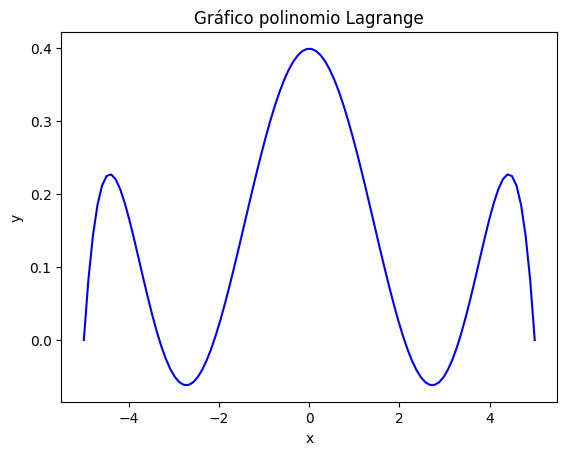

In [ ]:
#b)
pol_lagrange = lagrange(x_vals4, y_vals4)
x_vals42 = np.linspace(min(x_vals4), max(x_vals4), 100)

plt.plot(x_vals42, pol_lagrange(x_vals42), color = "blue")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Gráfico polinomio Lagrange")

In [ ]:
#c)
dy = np.zeros(len(x_vals4))

#Derivada en los extremos
dy[0] = (y_vals4[1] - y_vals4[0])/(x_vals4[1] - x_vals4[0])
dy[-1] = (y_vals4[-1] - y_vals4[-2])/(x_vals4[-1] - x_vals4[-2])

#Derivada puntos interiores
for i in range(1, len(x_vals4)-1):
  dy[i] = (y_vals4[i+1] - y_vals4[i-1])/(x_vals4[i+1] - x_vals4[i-1])

pol_hermite = CubicHermiteSpline(x_vals4, y_vals4, dy)

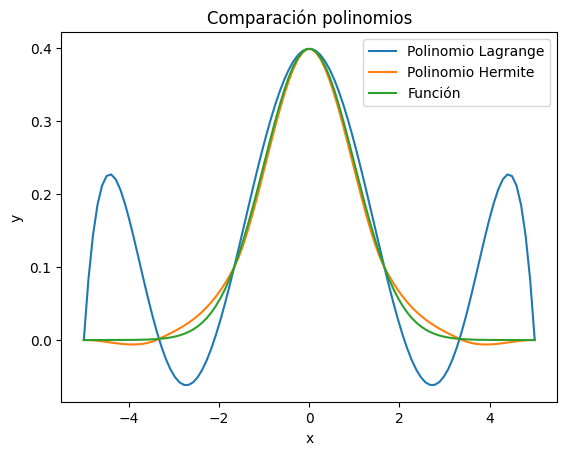

In [ ]:
#d)
f4_ = 1/sp.sqrt(2*sp.pi) * sp.exp(-x**2/2)
f4 = sp.lambdify(x, f4_, "numpy")

#e)
plt.plot(x_vals42, pol_lagrange(x_vals42), label = "Polinomio Lagrange")
plt.plot(x_vals42, pol_hermite(x_vals42), label = "Polinomio Hermite")
plt.plot(x_vals42, f4(x_vals42), label = "Función")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Comparación polinomios")
plt.legend()


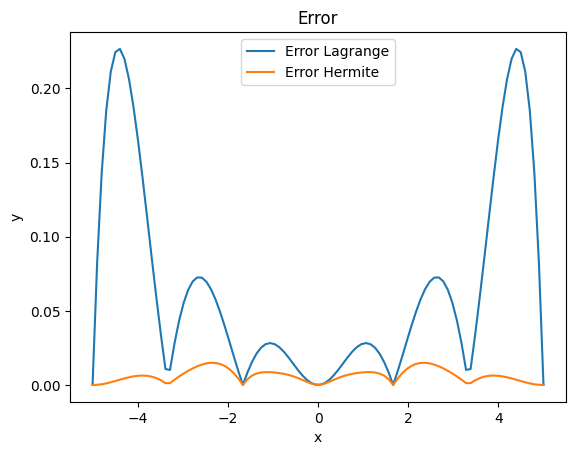

In [ ]:
plt.plot(x_vals42, np.abs(f4(x_vals42) - pol_lagrange(x_vals42)), label="Error Lagrange")
plt.plot(x_vals42, np.abs(f4(x_vals42) - pol_hermite(x_vals42)), label="Error Hermite")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Error")
plt.legend()

In [ ]:
#f)
f_prime2 = sp.diff(f4_, x, 2)
puntos_infl = sp.solve(f_prime2, x)

def df2(f, x, h):
  return (f(x + h) - 2 * f(x) + f(x - h)) / (h**2)

print("Valor exacto:")
print(f"-Los puntos de inflexión se encuentran en x={puntos_infl[0]} y x={puntos_infl[1]}")

for i in x_vals42:
  a = df2(f4, i, 0.01)
  if np.abs(a) <= 1e-5: print(f"x={i} es un punto de inflexión")


Valor exacto:
-Los puntos de inflexión se encuentran en x=-1 y x=1


In [ ]:
#g)
area1 = quad(f4, -1, 1 )[0]
area2 = quad(f4, -3, 3)[0]

print(f"El intervalo [-1, 1] es {round(area1*100,2)}% de la curva")
print(f"El intervalo [-3, 3] es {round(area2*100,2)}% de la curva")

El intervalo [-1, 1] es 68.27% de la curva
El intervalo [-3, 3] es 99.73% de la curva


#5

La función de onda del electrón en un estado $2s$ $(n = 2, l = 0, \text{ y } m = 0)$ dentro del átomo de hidrógeno puede definirse en unidades radiales adimensionales como:

$$ \psi_{200}(r, \theta, \varphi) = \frac{1}{4\sqrt{2\pi}} (2 - r) e^{-r/2}. $$

La probabilidad de que el electrón se localice entre las posiciones radiales $r = 0$ y $R$ se da por:

$$ \int_{0}^{R} \int_{0}^{\pi} \int_{0}^{2\pi} |\Psi_{210}(r, \theta, \varphi)|^2 r^2 \, dr \, \sin \theta \, d\theta \, d\varphi = \frac{1}{8} \int_{0}^{R} r^2 (2 - r)^2 e^{-r} \, dr. $$

* Realiza una gráfica de la función de onda para $0\leq r\leq 10$. Luego encuentra la función densidad de probabilidad $|\psi_{200}(r, \theta, \varphi)|^2$ y graficala, hallando su máximo utilizando un método númerico de derivación.

* Calcula las probabilidades de encontrar el electrón entre las posiciones radiales $ r = 0 $ y $ R \in [10, 25] $, con incrementos iguales a 1, utilizando el método de Romberg con una precisión relativa $ \epsilon = 10^{-8} $.

* Calcula la integral radial desde $ r = 0 $ hasta $ \infty $ utilizando las rutinas de integración `quad` simple y adaptativa. Verifica que la probabilidad total de encontrar el electrón en cualquier parte del espacio es, de hecho, igual a 1.


Text(0.5, 1.0, 'Funcion de onda')

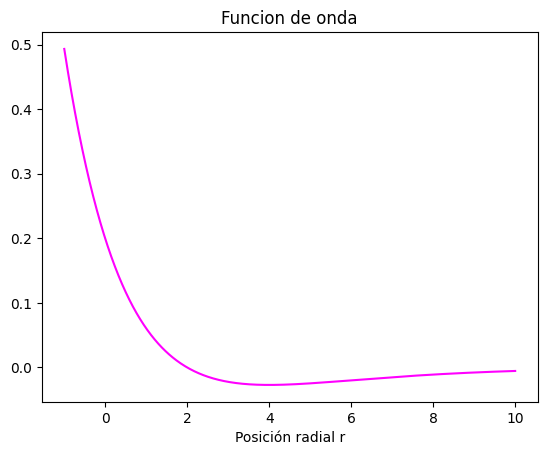

In [ ]:
#a)
#Funcion de onda
func_onda = lambda r: (1/(4*np.sqrt(2*np.pi))) * (2-r)*np.exp(-r/2)

r_vals = np.linspace(-1, 10, 500)

plt.plot(r_vals, func_onda(r_vals), color="magenta")
plt.xlabel("Posición radial r")
plt.title("Funcion de onda")

Text(0.5, 1.0, 'Densidad de probabilidad')

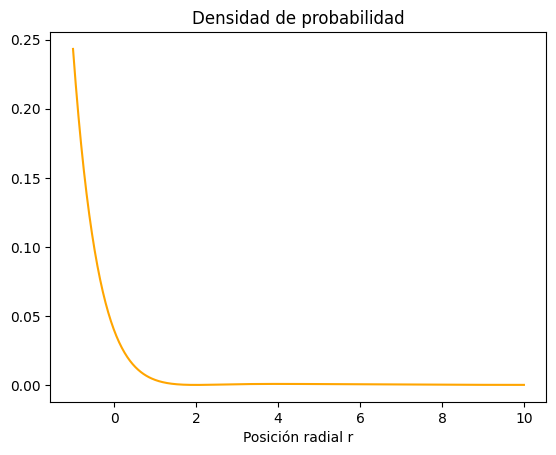

In [ ]:
#Función densidad de probabilidad
prob_dens = lambda r: func_onda(r)**2

plt.plot(r_vals, prob_dens(r_vals), color="orange")
plt.xlabel("Posición radial r")
plt.title("Densidad de probabilidad")

In [ ]:
print("El valor máximo está en x=0.0")

El valor máximo está en x=0.0


In [ ]:
#b)
prob = lambda r: (1/8) * r**2 * (2-r)**2 * np.exp(-r)
R_values = np.arange(10, 26, 1)

for i in R_values:
  valor = romberg(prob, 0, i, tol=1e-8)
  print(f"R = {i}, Probabilidad = {valor}")

R = 10, Probabilidad = 0.9404806920813836
R = 11, Probabilidad = 0.9682229265339636
R = 12, Probabilidad = 0.9835519435301561
R = 13, Probabilidad = 0.9917076990293624
R = 14, Probabilidad = 0.9959130363457396
R = 15, Probabilidad = 0.9980249034302309
R = 16, Probabilidad = 0.9990617942491749
R = 17, Probabilidad = 0.9995610579302463
R = 18, Probabilidad = 0.9997973955832533
R = 19, Probabilidad = 0.9999076063849978
R = 20, Probabilidad = 0.9999583214126018
R = 21, Probabilidad = 0.9999813828237293
R = 22, Probabilidad = 0.9999917579586304
R = 23, Probabilidad = 0.999996380776163
R = 24, Probabilidad = 0.9999984225600459
R = 25, Probabilidad = 0.9999993171766988


<ipython-input-107-023a1b6dd9db>:6: DeprecationWarning: `scipy.integrate.romberg` is deprecated as of SciPy 1.12.0and will be removed in SciPy 1.15.0. Please use`scipy.integrate.quad` instead.
  valor = romberg(prob, 0, i, tol=1e-8)


In [ ]:
#c)
probabilidad, error5 = quad(prob, 0, 5000)
print(f"La probabilidad de encontrar el electrón en cualquier parte del espacio es de {probabilidad}")

La probabilidad de encontrar el electrón en cualquier parte del espacio es de 1.0


# 6

Imagina que estamos estudiando el movimiento de un proyectil lanzado desde una altura inicial con una velocidad inicial en un ángulo específico. Queremos analizar el trayecto del proyectil, su altura máxima y la distancia que recorre antes de tocar el suelo.

La ecuación de la trayectoria del proyectil en términos de la distancia horizontal $x$ y la altura $y$ es:

$$ y(x) = y_0 + x \tan(\theta) - \frac{g x^2}{2 v_0^2 \cos^2(\theta)} $$

* Grafica la trayectoria del proyectil para los siguientes parámetros: $ y_0 = 1 \, \text{m} $, $ \theta = 45^\circ $, y $ v_0 = 20 \, \text{m/s} $.

* Calcula la altura máxima alcanzada por el proyectil a través de la derivada númerica y compara con el valor real.

* Encuentra la distancia horizontal total recorrida por el proyectil antes de tocar el suelo, esto implica encontrar la raíz de la ecuación $ y(x) = 0 $.

* Toma los valores de la trayectoria del proyectil en puntos de $ x \in \{0, 2, 4, 6, 8, 10\} $ y usa dos técnicas de interpolación para estimar la trayectoria en puntos intermedios.

* Si conocemos que:
$$y(t) = y_0 + v_{0y}t -\frac{1}{2}gt^2$$
encuentre el tiempo de vuelo para el proyectil. Luego, usando un método de integración encuentre cuál seria la altura alcanzada entre $0\leq t\leq 2$s.





Text(0.5, 1.0, 'Trayectoria proyectil')

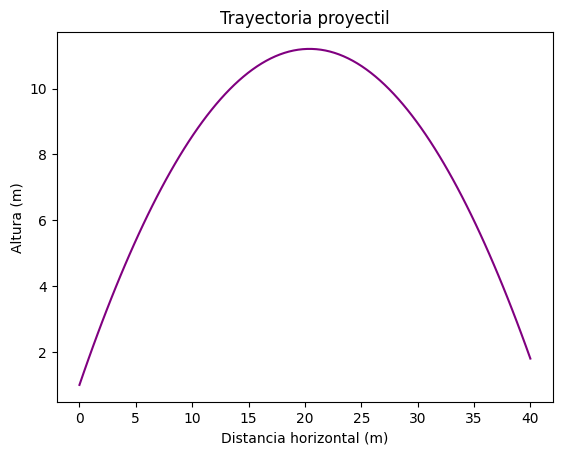

In [ ]:
#a)
theta = sp.pi/4
vo = 20
yo = 1
g = 9.8

f6_ = yo + x*sp.tan(theta) - g*x**2/(2*vo**2*sp.cos(theta)**2)
f6 = sp.lambdify(x, f6_, "numpy")

x_vals6 = np.linspace(0, 40, 100)

plt.plot(x_vals6, f6(x_vals6), color="purple")
plt.xlabel("Distancia horizontal (m)")
plt.ylabel("Altura (m)")
plt.title("Trayectoria proyectil")

In [ ]:
#b)
df_f6_ = sp.diff(f6_, x)
df_f6 = sp.lambdify(x, df_f6_, "numpy")

ymax = f6(bisect(df_f6, 15, 25) )
ymax_real = yo + vo**2*np.sin(np.pi/4)**2/(2*g)

print("Altura máxima:")
print(f"-Con la derivada de la función, y={ymax}m")
print(f"-Valor real, y={ymax_real}m")

Altura máxima:
-Con la derivada de la función, y=11.204081632653061m
-Valor real, y=11.204081632653057m


In [ ]:
#c)
xmax = bisect(f6, 40, 45)
print(f"Distancia horizontal recorrida: {xmax}m")

Distancia horizontal recorrida: 41.79295819988624m


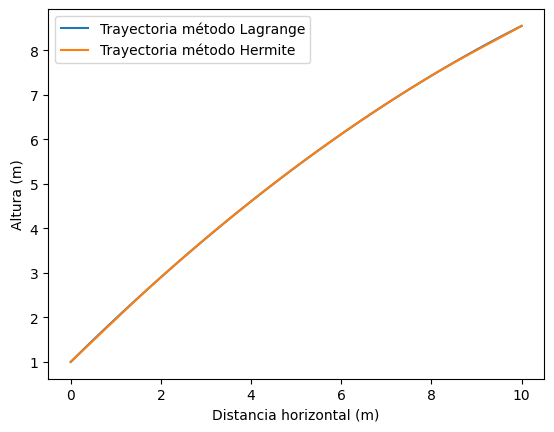

In [ ]:
#d)
x_points6 = np.array([0,2,4,6,8,10])
y_points6 = f6(x_points6)

dy6 = np.zeros(len(x_points6))

#Derivada en los extremos
dy6[0] = (y_points6[1] - y_points6[0])/(x_points6[1] - x_points6[0])
dy6[-1] = (y_points6[-1] - y_points6[-2])/(x_points6[-1] - x_points6[-2])

#Derivada puntos interiores
for i in range(1, len(x_points6)-1):
  dy6[i] = (y_points6[i+1] - y_points6[i-1])/(x_points6[i+1] - x_points6[i-1])

#Interpolación lagrange
pol_lagrange6 = lagrange(x_points6, y_points6)

#Interpolación Hermite
pol_hermite6 = CubicHermiteSpline(x_points6, y_points6, dy6)

#Gráfico
xx = np.linspace(min(x_points6), max(x_points6), 100)
plt.plot(xx, pol_lagrange6(xx), label="Trayectoria método Lagrange")
plt.plot(xx, pol_hermite6(xx), label="Trayectoria método Hermite")
plt.xlabel("Distancia horizontal (m)")
plt.ylabel("Altura (m)")
plt.legend()

In [ ]:
#e)
yt = lambda t: yo + vo*np.sin(np.pi/4)*t - 0.5*g*t**2
tiempo = bisect(yt, 0,10)
print(f"El tiempo de vuelo del proyectil es de {tiempo}s")

El tiempo de vuelo del proyectil es de 2.95520841489747s


In [ ]:
altura = lambda t: vo*np.sin(np.pi/4) - g*t
area, error6 = quad(altura, 0, 2)
print(f"La altura entre 0≤t≤2s es de {area}m")

La altura entre 0≤t≤2s es de 8.684271247461895m
